# Lazy Predict for classification

In [22]:
!pip install lazypredict

In [4]:
# Imports
import tensorflow as tf
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
import numpy as np
import lazypredict
import matplotlib.pyplot as plt
import seaborn as sns
import random

#from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, f1_score

## Set random seed for reproducibility

In [5]:
SEED = 64

#torch.backends.cudnn.deterministic = True
#torch.backends.cudnn.benchmark = False
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

## Data Loading

In [30]:
# Only modify this
file_name = "covtype"

In [31]:
df = pd.read_csv(f'../Datasets/{file_name}.csv')

In [32]:
# Display the first few rows of the dataframe
print(df.head())

# Display the dataframe's information (column types, non-null values, etc.)
print(df.info())

# Get the number of rows and columns
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

      0    1   2    3    4     5    6    7    8     9  ...  45  46  47  48  \
0  2596   51   3  258    0   510  221  232  148  6279  ...   0   0   0   0   
1  2590   56   2  212   -6   390  220  235  151  6225  ...   0   0   0   0   
2  2804  139   9  268   65  3180  234  238  135  6121  ...   0   0   0   0   
3  2785  155  18  242  118  3090  238  238  122  6211  ...   0   0   0   0   
4  2595   45   2  153   -1   391  220  234  150  6172  ...   0   0   0   0   

   49  50  51  52  53  54  
0   0   0   0   0   0   5  
1   0   0   0   0   0   5  
2   0   0   0   0   0   2  
3   0   0   0   0   0   2  
4   0   0   0   0   0   5  

[5 rows x 55 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       581012 non-null  int64
 1   1       581012 non-null  int64
 2   2       581012 non-null  int64
 3   3       581012 non-null  int64
 4   4       

In [33]:
# Summary statistics for numerical columns
print(df.describe())

# For categorical columns if any
#print(df.describe(include='object'))

              0         1         2         3         4         5         6  \
count 581012.00 581012.00 581012.00 581012.00 581012.00 581012.00 581012.00   
mean    2959.37    155.66     14.10    269.43     46.42   2350.15    212.15   
std      279.98    111.91      7.49    212.55     58.30   1559.25     26.77   
min     1859.00      0.00      0.00      0.00   -173.00      0.00      0.00   
25%     2809.00     58.00      9.00    108.00      7.00   1106.00    198.00   
50%     2996.00    127.00     13.00    218.00     30.00   1997.00    218.00   
75%     3163.00    260.00     18.00    384.00     69.00   3328.00    231.00   
max     3858.00    360.00     66.00   1397.00    601.00   7117.00    254.00   

              7         8         9  ...        45        46        47  \
count 581012.00 581012.00 581012.00  ... 581012.00 581012.00 581012.00   
mean     223.32    142.53   1980.29  ...      0.09      0.08      0.00   
std       19.77     38.27   1324.20  ...      0.29      0.27      

In [34]:
# Check for missing values
print(df.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
dtype: int64


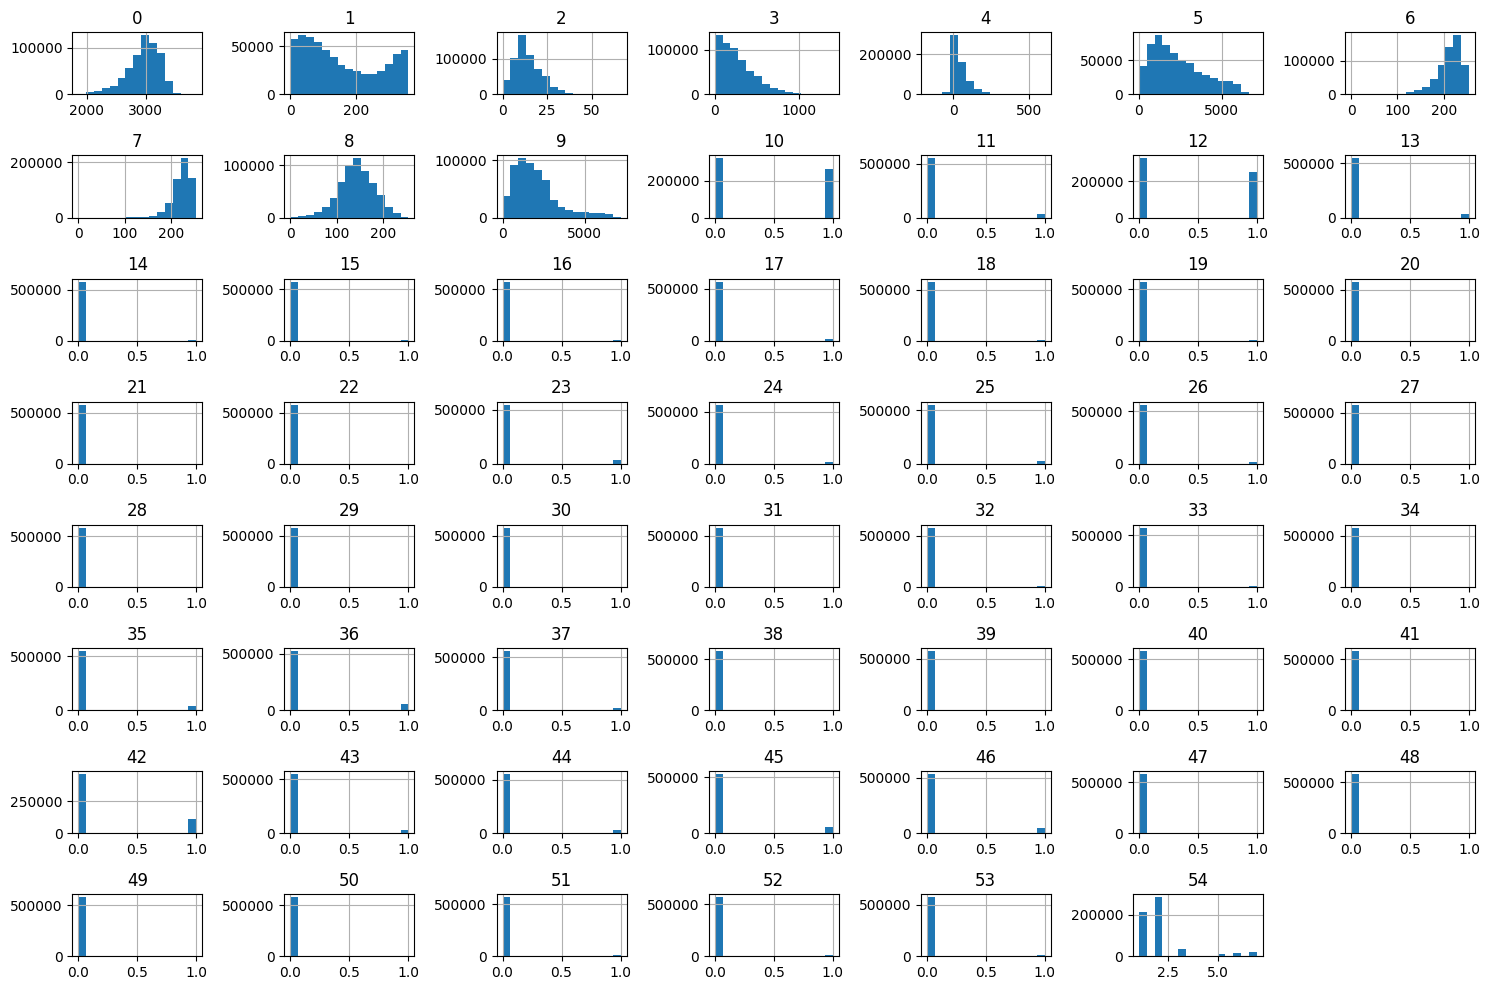

In [35]:
# Histograms for numerical data
df.hist(bins=15, figsize=(15, 10))
plt.tight_layout()  # Adjusts subplot params so that subplots are nicely fit in the figure.
plt.show()

## Data Preprocessing

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.iloc[:,:-1]

X = scaler.fit_transform(X)
X

array([[-1.29780509, -0.93515698, -1.48281978, ..., -0.16595612,
        -0.15601398, -0.12365355],
       [-1.31923485, -0.89047967, -1.61636259, ..., -0.16595612,
        -0.15601398, -0.12365355],
       [-0.5549068 , -0.14883628, -0.68156292, ..., -0.16595612,
        -0.15601398, -0.12365355],
       ...,
       [-2.04784663,  0.02987297,  0.38677957, ..., -0.16595612,
        -0.15601398, -0.12365355],
       [-2.05498988,  0.12816306,  0.11969395, ..., -0.16595612,
        -0.15601398, -0.12365355],
       [-2.05856151,  0.08348575, -0.14739167, ..., -0.16595612,
        -0.15601398, -0.12365355]])

In [37]:
y = df.iloc[:,-1]
y

0         5
1         5
2         2
3         2
4         5
         ..
581007    3
581008    3
581009    3
581010    3
581011    3
Name: 54, Length: 581012, dtype: int64

In [38]:
y.unique()

array([5, 2, 1, 7, 3, 6, 4], dtype=int64)

In [39]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.40, random_state = 123)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.50, random_state = 123)

In [40]:
y_val

208012    1
152006    1
307374    2
486928    2
26749     2
         ..
435561    1
212919    1
26483     2
45810     2
161296    2
Name: 54, Length: 116202, dtype: int64

## Model Architecture (Lazy Predict)

In [41]:
#lazypredict.supervised.REGRESSORS = lazypredict.supervised.REGRESSORS[33:36]
#lazypredict.supervised.REGRESSORS

In [42]:
LazyClassifier

lazypredict.Supervised.LazyClassifier

In [43]:
clf = LazyClassifier(verbose=2, ignore_warnings=True, custom_metric=None)

## Model Training

In [44]:
models, predictions = clf.fit(X_train, X_val, y_train, y_val)

  3%|▎         | 1/29 [00:35<16:23, 35.12s/it]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.5627355811431817, 'Balanced Accuracy': 0.3369436535454187, 'ROC AUC': None, 'F1 Score': 0.5815052006516493, 'Time taken': 35.118467569351196}


  7%|▋         | 2/29 [01:12<16:16, 36.18s/it]

{'Model': 'BaggingClassifier', 'Accuracy': 0.9552933684446051, 'Balanced Accuracy': 0.9080516735454273, 'ROC AUC': None, 'F1 Score': 0.9551174165892738, 'Time taken': 36.918155908584595}


 10%|█         | 3/29 [01:12<08:42, 20.09s/it]

{'Model': 'BernoulliNB', 'Accuracy': 0.6376396275451369, 'Balanced Accuracy': 0.5258081099793207, 'ROC AUC': None, 'F1 Score': 0.6389024590010631, 'Time taken': 0.9381647109985352}


 14%|█▍        | 4/29 [06:48<1:00:15, 144.62s/it]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.7128534792860708, 'Balanced Accuracy': 0.4742894905904044, 'ROC AUC': None, 'F1 Score': 0.7019746511560057, 'Time taken': 335.51866817474365}


 21%|██        | 6/29 [06:54<24:11, 63.09s/it]   

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.9305691812533348, 'Balanced Accuracy': 0.8878363720355001, 'ROC AUC': None, 'F1 Score': 0.9305516030928409, 'Time taken': 5.66883397102356}


 24%|██▍       | 7/29 [06:55<15:39, 42.71s/it]

{'Model': 'DummyClassifier', 'Accuracy': 0.48833066556513655, 'Balanced Accuracy': 0.14285714285714285, 'ROC AUC': None, 'F1 Score': 0.32044873420751646, 'Time taken': 0.7558610439300537}


 28%|██▊       | 8/29 [06:58<10:33, 30.15s/it]

{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.8539267826715548, 'Balanced Accuracy': 0.7783962366740855, 'ROC AUC': None, 'F1 Score': 0.8540338921863344, 'Time taken': 3.2672200202941895}


 31%|███       | 9/29 [08:22<15:39, 46.96s/it]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.9472212182234385, 'Balanced Accuracy': 0.8966965359436666, 'ROC AUC': None, 'F1 Score': 0.9469451647292414, 'Time taken': 83.90317440032959}


 34%|███▍      | 10/29 [08:24<10:25, 32.90s/it]

{'Model': 'GaussianNB', 'Accuracy': 0.08832033872050395, 'Balanced Accuracy': 0.44777296668408345, 'ROC AUC': None, 'F1 Score': 0.056149990596903766, 'Time taken': 1.415442705154419}


 38%|███▊      | 11/29 [09:04<10:32, 35.14s/it]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.9209480043372748, 'Balanced Accuracy': 0.8491326603327882, 'ROC AUC': None, 'F1 Score': 0.9206990812231707, 'Time taken': 40.218883991241455}


 48%|████▊     | 14/29 [09:08<03:15, 13.06s/it]

{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.6808230495172201, 'Balanced Accuracy': 0.5768478848416053, 'ROC AUC': None, 'F1 Score': 0.6838056859608672, 'Time taken': 3.1309010982513428}


 52%|█████▏    | 15/29 [18:51<43:05, 184.68s/it]

{'Model': 'LinearSVC', 'Accuracy': 0.7123629541660212, 'Balanced Accuracy': 0.44540754490605367, 'ROC AUC': None, 'F1 Score': 0.6964572325550353, 'Time taken': 582.4117338657379}


 55%|█████▌    | 16/29 [19:01<28:37, 132.14s/it]

{'Model': 'LogisticRegression', 'Accuracy': 0.7247637734290288, 'Balanced Accuracy': 0.5017190917129998, 'ROC AUC': None, 'F1 Score': 0.714563204588976, 'Time taken': 10.121096134185791}


 59%|█████▊    | 17/29 [19:02<18:31, 92.66s/it] 

{'Model': 'NearestCentroid', 'Accuracy': 0.5485619868849073, 'Balanced Accuracy': 0.5945893590911554, 'ROC AUC': None, 'F1 Score': 0.5830266520095034, 'Time taken': 0.8421759605407715}


 66%|██████▌   | 19/29 [19:07<07:48, 46.81s/it]

{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.6598509492091358, 'Balanced Accuracy': 0.4467713289225241, 'ROC AUC': None, 'F1 Score': 0.6545614498504657, 'Time taken': 4.410583972930908}


 69%|██████▉   | 20/29 [19:12<05:09, 34.39s/it]

{'Model': 'Perceptron', 'Accuracy': 0.6312111667613294, 'Balanced Accuracy': 0.3992959925164632, 'ROC AUC': None, 'F1 Score': 0.636166946266822, 'Time taken': 5.440777063369751}


 72%|███████▏  | 21/29 [19:14<03:17, 24.73s/it]

{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.08258893994939846, 'Balanced Accuracy': 0.42100055392405233, 'ROC AUC': None, 'F1 Score': 0.04260453025982928, 'Time taken': 2.1969194412231445}


 76%|███████▌  | 22/29 [20:20<04:19, 37.12s/it]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.9488907247723791, 'Balanced Accuracy': 0.8933827428339708, 'ROC AUC': None, 'F1 Score': 0.9485607706858171, 'Time taken': 66.02747678756714}


 79%|███████▉  | 23/29 [20:21<02:37, 26.30s/it]

{'Model': 'RidgeClassifier', 'Accuracy': 0.7007194368427394, 'Balanced Accuracy': 0.37129220661157575, 'ROC AUC': None, 'F1 Score': 0.6781149189781702, 'Time taken': 1.0480849742889404}


 83%|████████▎ | 24/29 [20:24<01:36, 19.28s/it]

{'Model': 'RidgeClassifierCV', 'Accuracy': 0.7007366482504604, 'Balanced Accuracy': 0.3712989697201709, 'ROC AUC': None, 'F1 Score': 0.6781313629998166, 'Time taken': 2.9099485874176025}


 86%|████████▌ | 25/29 [20:33<01:04, 16.01s/it]

{'Model': 'SGDClassifier', 'Accuracy': 0.7131460732173285, 'Balanced Accuracy': 0.4369715345919965, 'ROC AUC': None, 'F1 Score': 0.6997188804328809, 'Time taken': 8.383768796920776}


 90%|████████▉ | 26/29 [3:48:51<3:08:03, 3761.13s/it]

{'Model': 'SVC', 'Accuracy': 0.7904511109963684, 'Balanced Accuracy': 0.5966510803924511, 'ROC AUC': None, 'F1 Score': 0.7837607217532708, 'Time taken': 12498.577402591705}


 97%|█████████▋| 28/29 [3:48:52<33:45, 2025.32s/it]  

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015887 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2145
[LightGBM] [Info] Number of data points in the train set: 348607, number of used features: 53
[LightGBM] [Info] Start training from score -1.008326
[LightGBM] [Info] Start training from score -0.717935
[LightGBM] [Info] Start training from score -2.784730
[LightGBM] [Info] Start training from score -5.391470
[LightGBM] [Info] Start training from score -4.107357
[LightGBM] [Info] Start training from score -3.519571
[LightGBM] [Info] Start training from score -3.351035


100%|██████████| 29/29 [3:48:59<00:00, 473.76s/it] 

{'Model': 'LGBMClassifier', 'Accuracy': 0.8524982358307086, 'Balanced Accuracy': 0.8018043108856231, 'ROC AUC': None, 'F1 Score': 0.8518458713180316, 'Time taken': 6.567655324935913}


## Model Evaluation

In [45]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.96,0.91,None,0.96,36.92
ExtraTreesClassifier,0.95,0.90,None,0.95,83.90
RandomForestClassifier,0.95,0.89,None,0.95,66.03
DecisionTreeClassifier,0.93,0.89,None,0.93,5.67
KNeighborsClassifier,0.92,0.85,None,0.92,40.22
LGBMClassifier,0.85,0.80,None,0.85,6.57
ExtraTreeClassifier,0.85,0.78,None,0.85,3.27
SVC,0.79,0.60,None,0.78,12498.58
NearestCentroid,0.55,0.59,None,0.58,0.84


In [46]:
# Convert results into a DataFrame
test_results = pd.DataFrame(models)

In [47]:
# Save to a text file
test_results.to_csv(f'model_results/{file_name}_results_val.txt', index=True)